In [1]:
# decision tree work on non linear classicication 

In [77]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('Social_Network_Ads.csv')

In [7]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [13]:
x=df.iloc[:,2:-1]

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

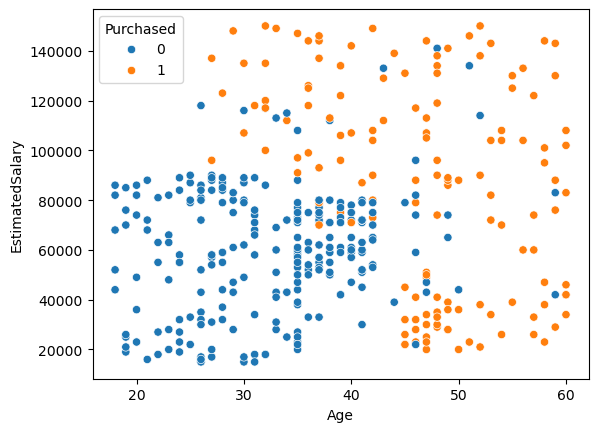

In [55]:
sns.scatterplot(x="Age",y="EstimatedSalary",data=df,hue="Purchased")

In [17]:
y=df.iloc[:,-1]

In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [23]:
from sklearn.preprocessing import StandardScaler

In [27]:
# to scale the database 
ss=StandardScaler()

In [29]:
ss.fit(x)

StandardScaler()

In [33]:
x=pd.DataFrame(ss.transform(x),columns=x.columns)

In [35]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [37]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dtc=DecisionTreeClassifier()

In [47]:
dtc.fit(x_train,y_train);

In [49]:
dtc.score(x_test,y_test)

0.8375

In [65]:
from mlxtend.plotting import plot_decision_regions


C:\Users\91935\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

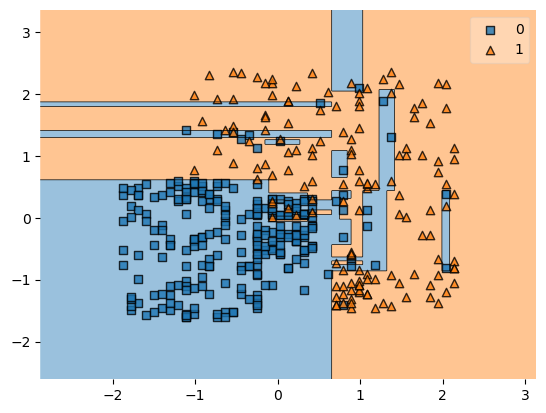

In [67]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dtc)

In [71]:
from sklearn.tree import plot_tree

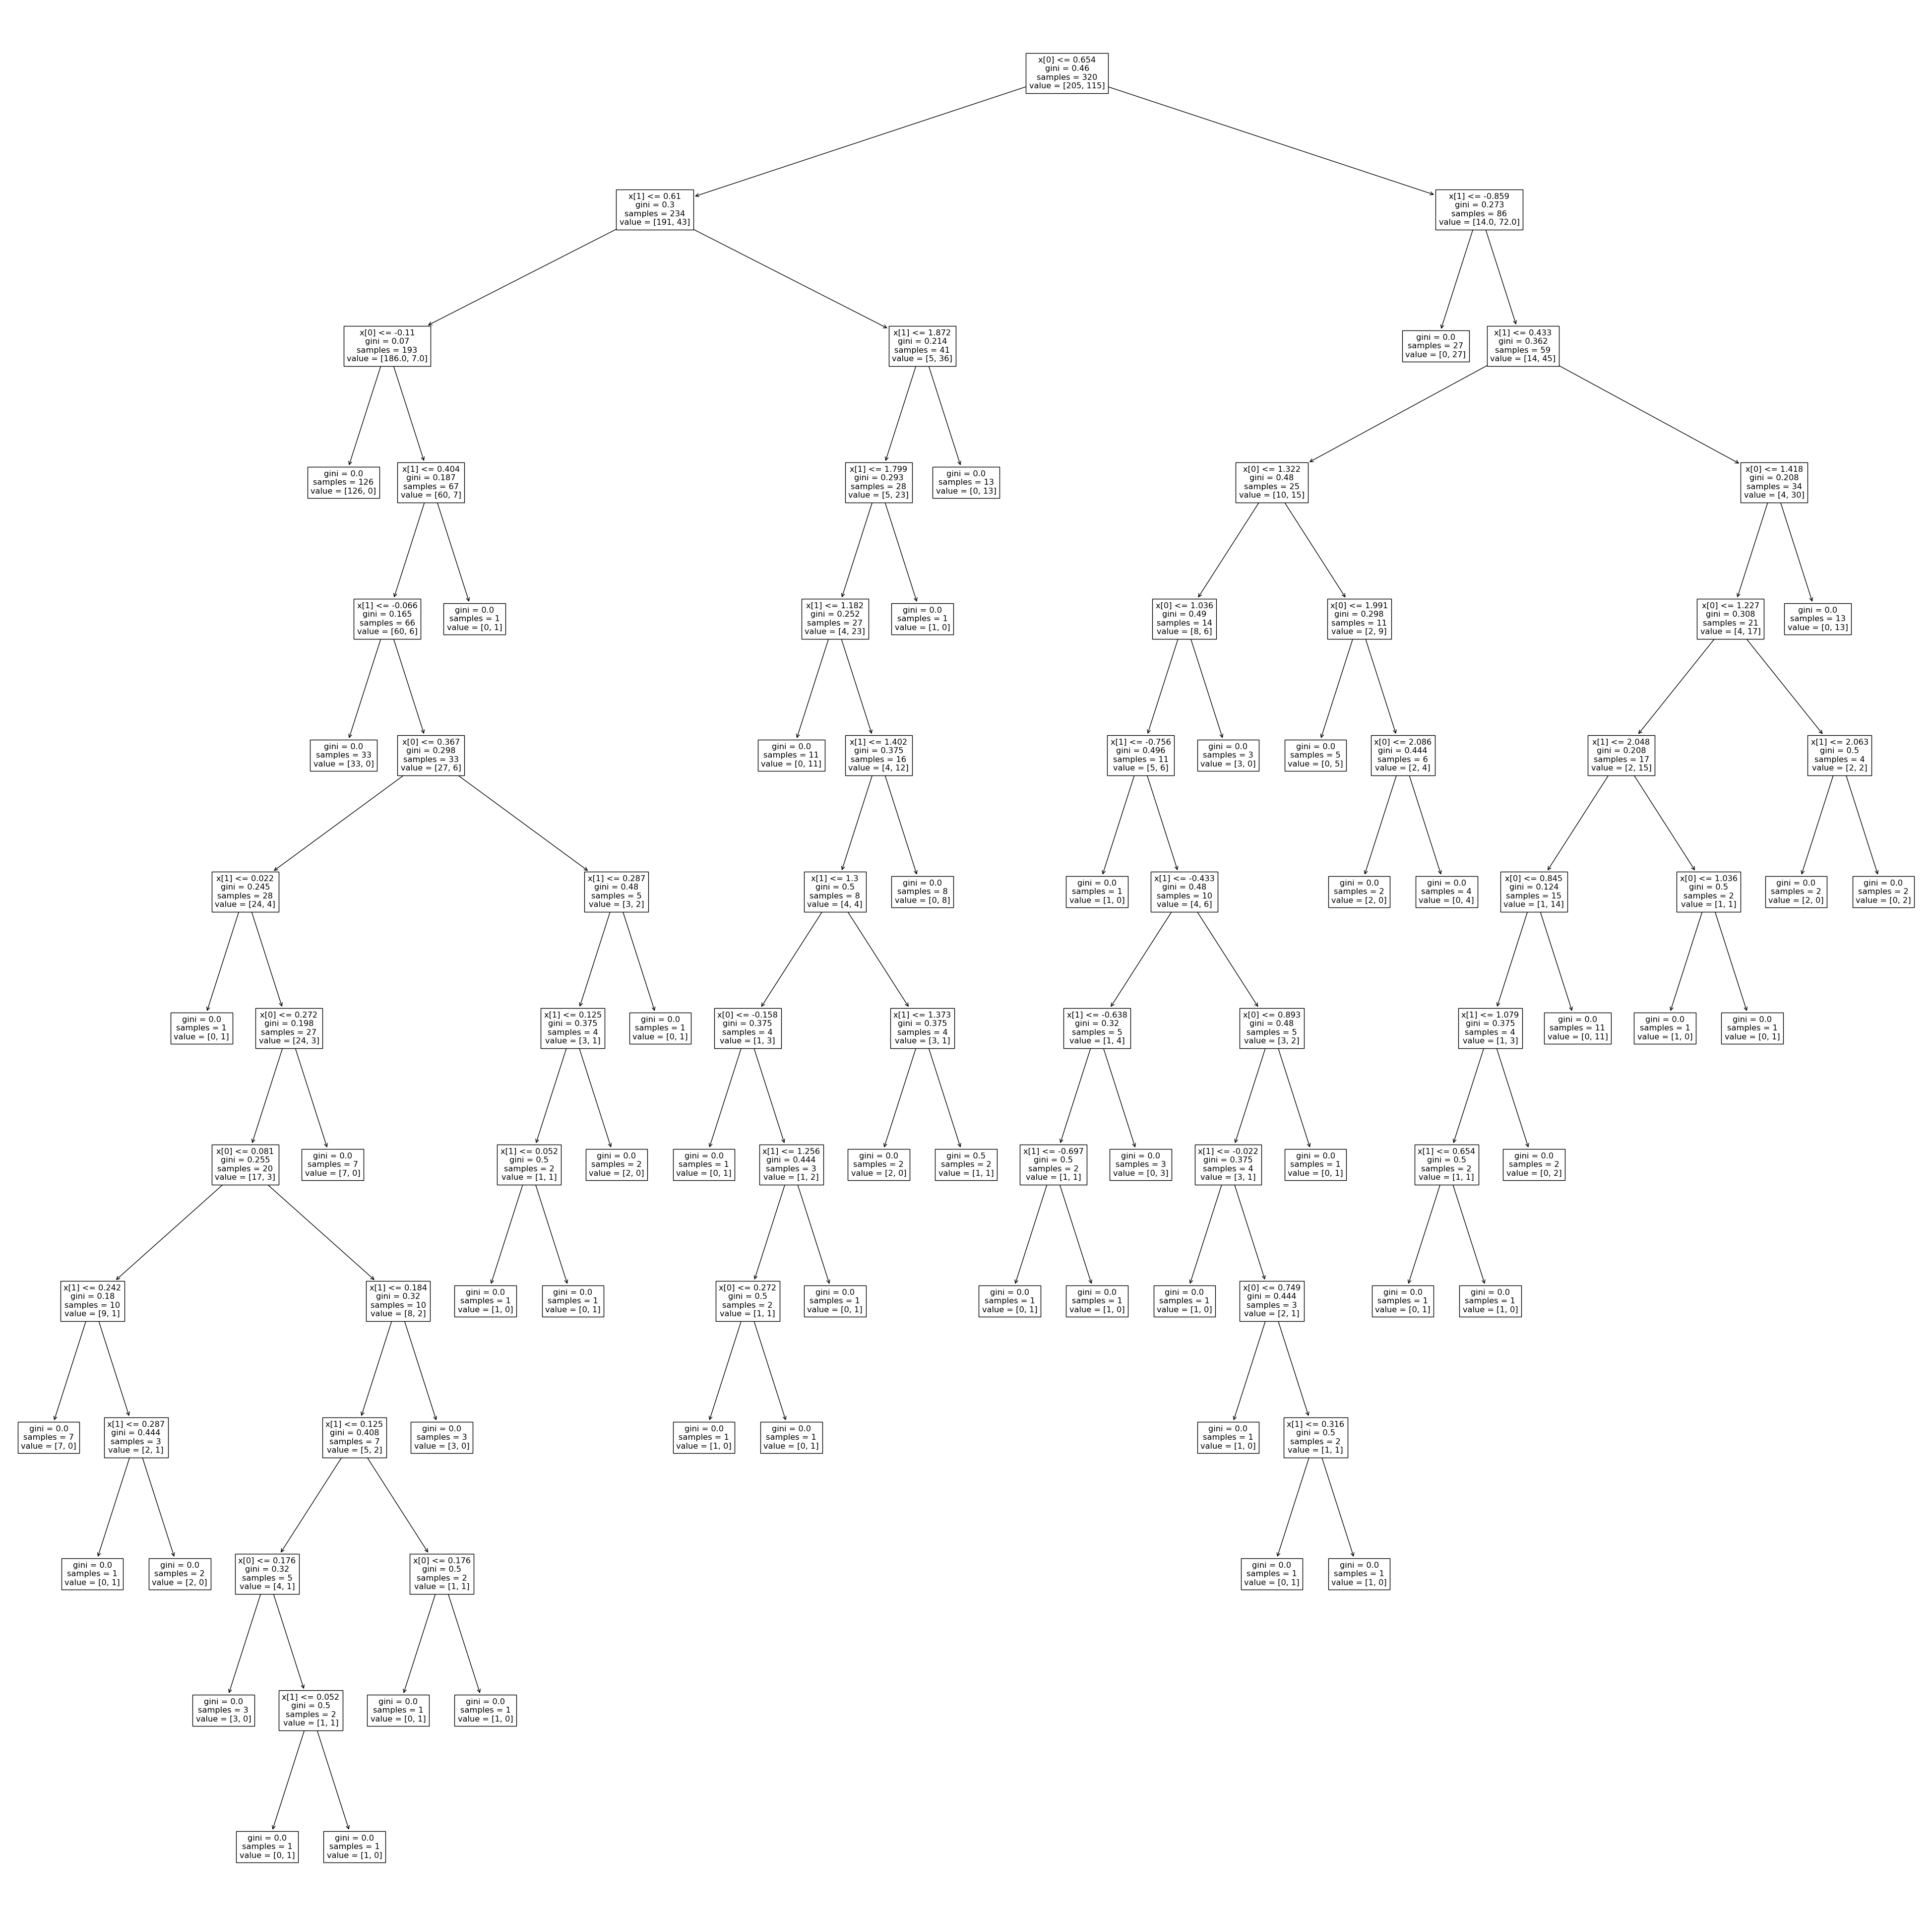

In [85]:
plt.figure(figsize=(50,50))
plot_tree(dtc)
plt.savefig("demo_tree.jpeg")
plt.show()

In [87]:
# this is classified on the bassis of the gimi /we can calassifiy on the basis of entropy

In [95]:
dtc1=DecisionTreeClassifier(criterion="entropy")

In [97]:
dtc1.fit(x_train,y_train);

In [99]:
 dtc1.score(x_test,y_test)

0.8375

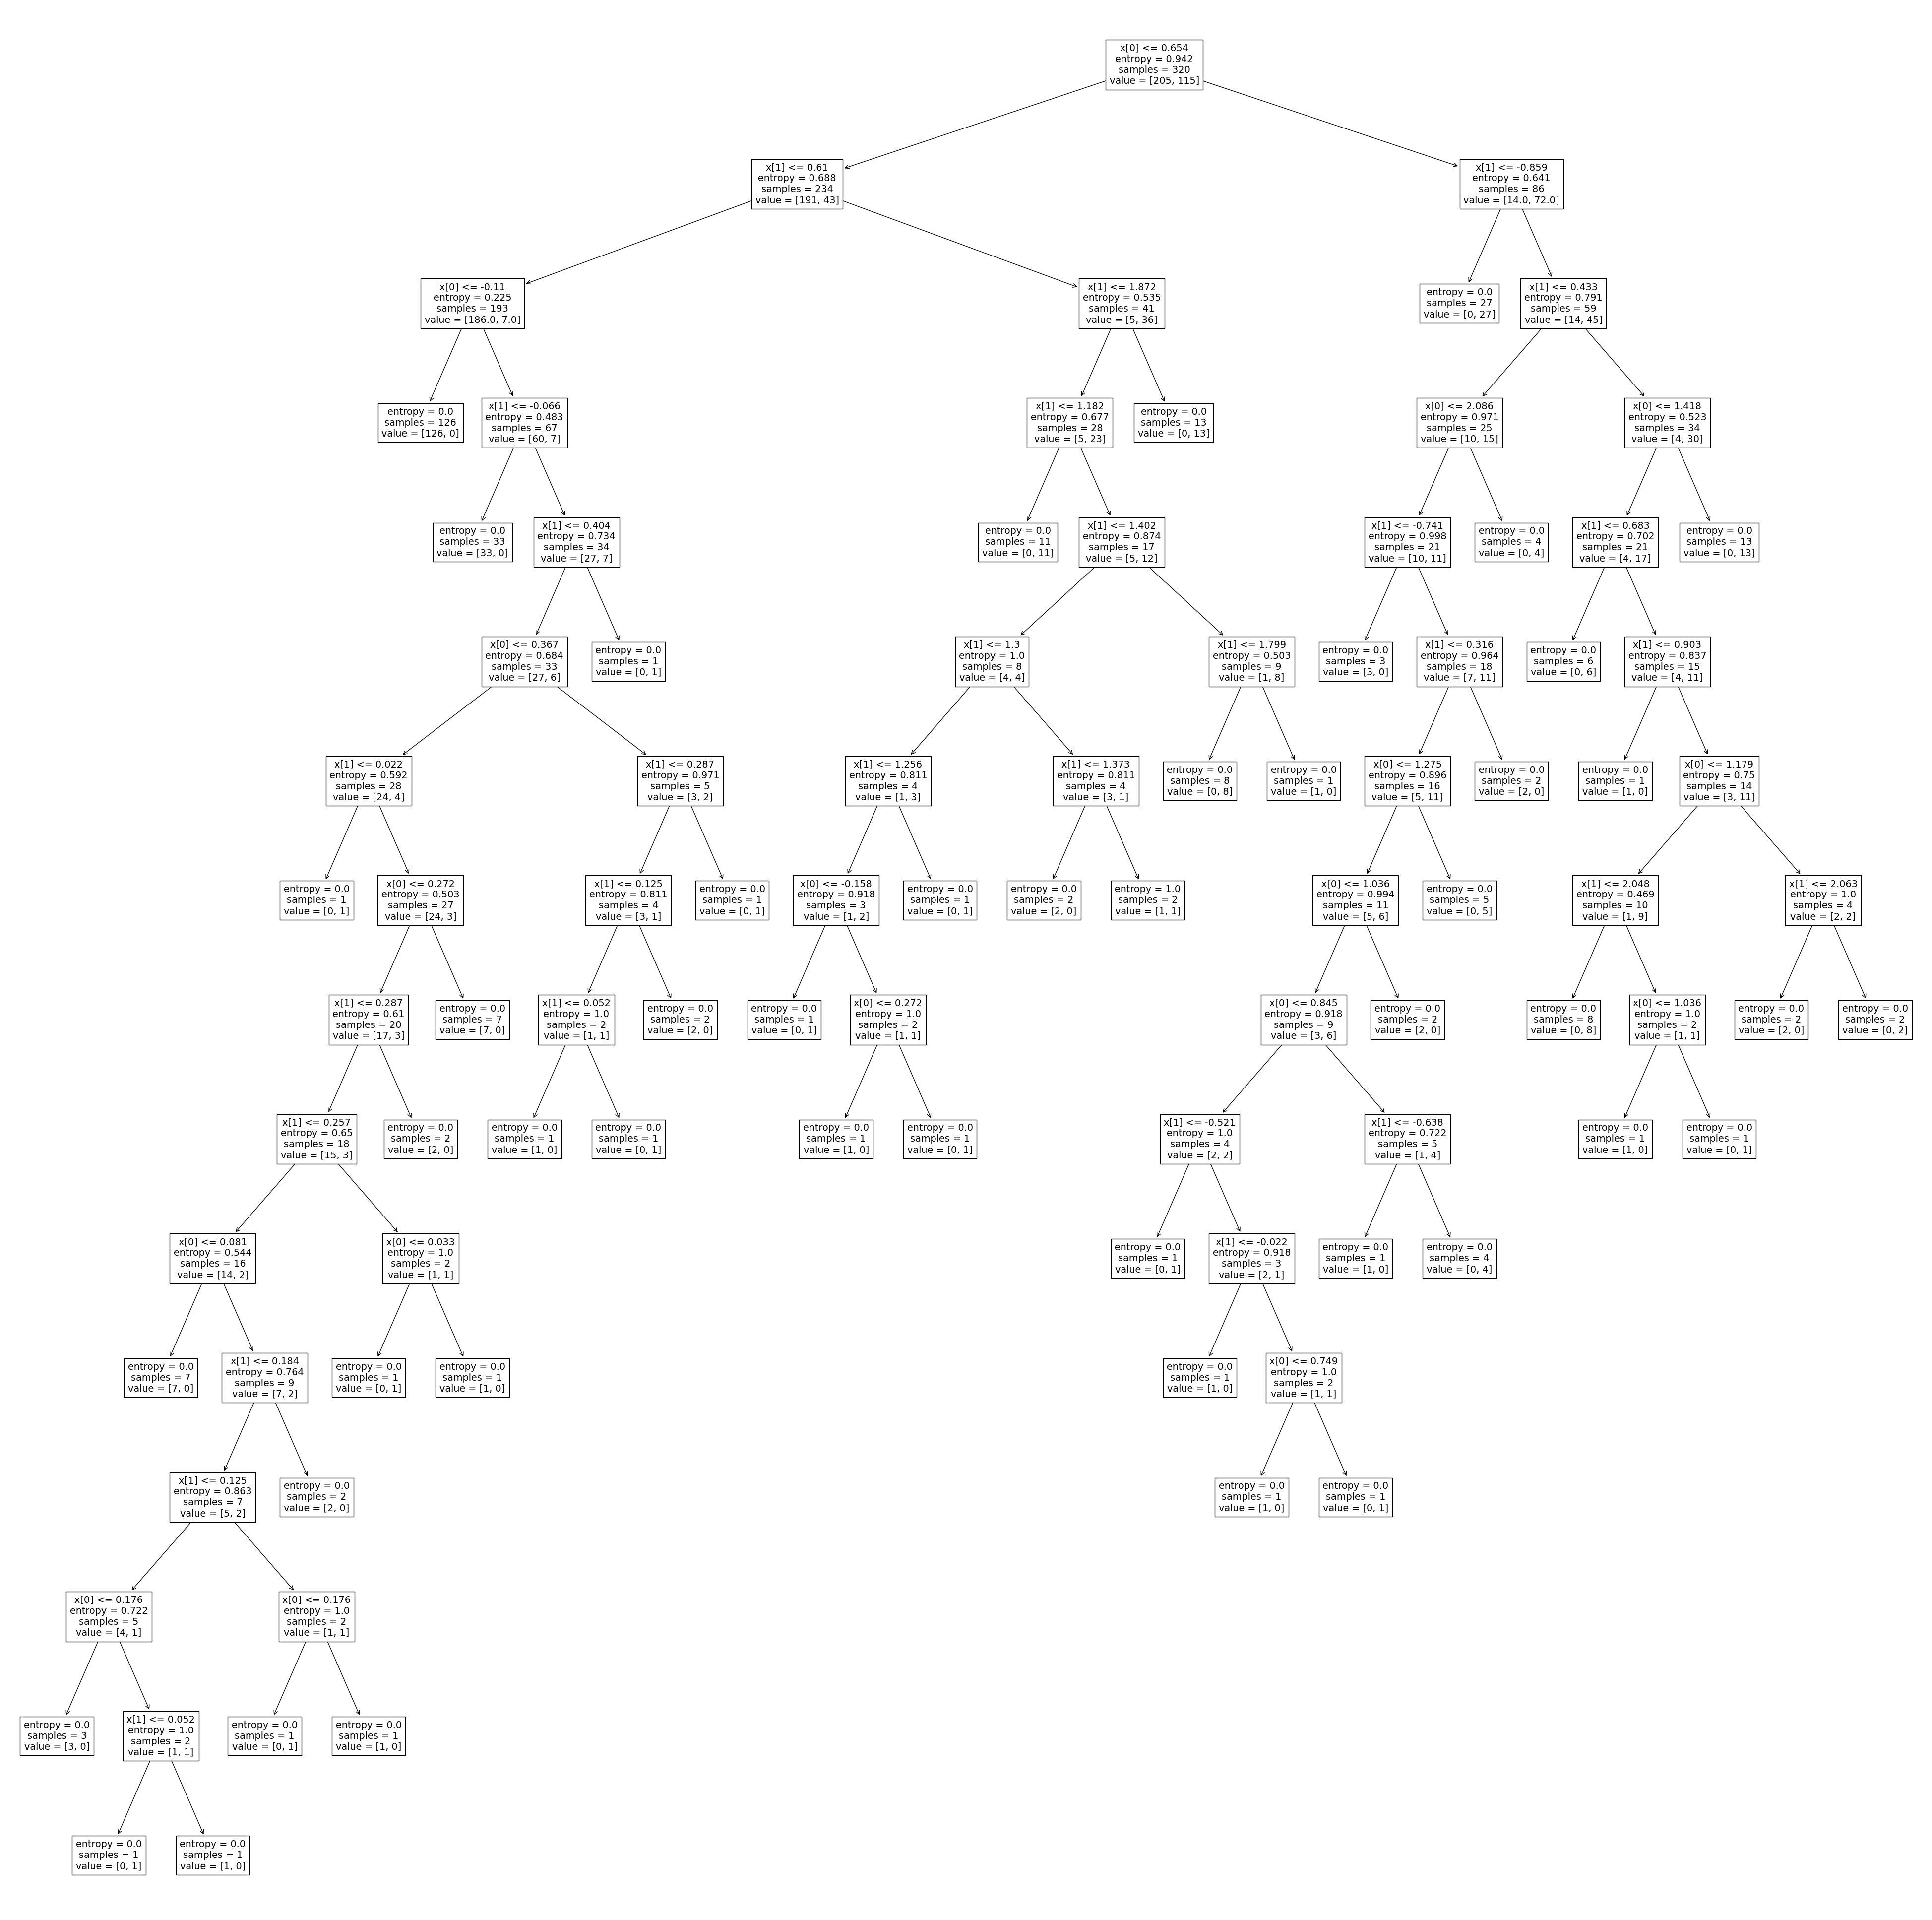

In [101]:
plt.figure(figsize=(50,50))
plot_tree(dtc1)
plt.savefig("demo_tree.jpeg")
plt.show()

In [103]:
# pruning 
# to minimizing the depth according to the accuracy of the model
# to stop model from